# Pontifícia Universidade Católica do Paraná
## Disciplina: Técnicas de Machine Learning
#### Conteúdo complementar da Semana 6 - Métricas

A ideia deste notebook é a de apresentarmos as métricas para a avaliação de diferentes modelos de ML.

In [1]:
from sklearn.model_selection import train_test_split # utilizado para o split entre treinamento e teste
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # random forest para regressão e classificação
from sklearn.metrics import * # importando todas as funções de métricas do scikit-learn

import pandas as pd # importando o pandas para manipularmos os datasets
import numpy as np # importando o numpy para realizar manipulações de vetores
import matplotlib.pyplot as plt # utilizado para a geração de gráficos
import seaborn as sns # utilizado para a geração de gráficos

In [2]:
# forçando a saída do pandas para que somente 3 dígitos sejam mostrados ao invés da notação científica
pd.options.display.float_format = '{:.3f}'.format

## Leitura da base de dados de regressão
O dataset ```saldoconta``` contém alguns exemplos hipotéticos de saldos bancários e as suas previsões fornecidas por um algoritmo fictício.

In [3]:
df_saldoconta = pd.read_csv('saldoconta.tsv', sep='\t')
df_saldoconta

,SaldoConta,Predicao
0,150150,15
1,100,10
2,10,100
3,1,1
4,0,0
5,0,10
6,0,0
7,50,49
8,500,490
9,500,510


Compare os resultados abaixo. Depois disso, busque alterar alguns valores da coluna ```Predicao``` e compare os resultados novamente. O que percebe?

In [4]:
for index, row in df_saldoconta.iterrows():
    df_saldoconta.loc[index, 'MAE'] = mean_absolute_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'RMSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']], squared=False)
    df_saldoconta.loc[index, 'MSLE'] = mean_squared_log_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MAPE'] = mean_absolute_percentage_error([row['SaldoConta']], [row['Predicao']])

display(f"R2 para todas as instâncias: {r2_score(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAE para todas as instâncias: {mean_absolute_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"RMSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'], squared=False)}")
display(f"MSLE para todas as instâncias: {mean_squared_log_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAPE para todas as instâncias: {mean_absolute_percentage_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")

df_saldoconta

'R2 para todas as instâncias: 0.9047688567768248'

'MAE para todas as instâncias: 11603.692307692309'

'MSE para todas as instâncias: 1733906517.5384614'

'RMSE para todas as instâncias: 41640.20313997593'

'MSLE para todas as instâncias: 7.634412644768582'

'MAPE para todas as instâncias: 3464307405669613.0'

,SaldoConta,Predicao,MAE,MSE,RMSE,MSLE,MAPE
0,150150,15,150135.000,22540518225.000,150135.000,83.664,1.000
1,100,10,90.000,8100.000,90.000,4.916,0.900
2,10,100,90.000,8100.000,90.000,4.916,9.000
3,1,1,0.000,0.000,0.000,0.000,0.000
4,0,0,0.000,0.000,0.000,0.000,0.000
5,0,10,10.000,100.000,10.000,5.750,45035996273704960.000
6,0,0,0.000,0.000,0.000,0.000,0.000
7,50,49,1.000,1.000,1.000,0.000,0.020
8,500,490,10.000,100.000,10.000,0.000,0.020
9,500,510,10.000,100.000,10.000,0.000,0.020


Mudando a predição da linha 5 para um zero:

In [5]:
df_saldoconta.loc[5, 'Predicao'] = 0

for index, row in df_saldoconta.iterrows():
    df_saldoconta.loc[index, 'MAE'] = mean_absolute_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'RMSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']], squared=False)
    df_saldoconta.loc[index, 'MSLE'] = mean_squared_log_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MAPE'] = mean_absolute_percentage_error([row['SaldoConta']], [row['Predicao']])

display(f"R2 para todas as instâncias: {r2_score(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAE para todas as instâncias: {mean_absolute_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"RMSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'], squared=False)}")
display(f"MSLE para todas as instâncias: {mean_squared_log_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAPE para todas as instâncias: {mean_absolute_percentage_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")

df_saldoconta

'R2 para todas as instâncias: 0.9047688571993086'

'MAE para todas as instâncias: 11602.923076923076'

'MSE para todas as instâncias: 1733906509.8461537'

'RMSE para todas as instâncias: 41640.203047609575'

'MSLE para todas as instâncias: 7.1921125109755994'

'MAPE para todas as instâncias: 0.8431630846076997'

,SaldoConta,Predicao,MAE,MSE,RMSE,MSLE,MAPE
0,150150,15,150135.000,22540518225.000,150135.000,83.664,1.000
1,100,10,90.000,8100.000,90.000,4.916,0.900
2,10,100,90.000,8100.000,90.000,4.916,9.000
3,1,1,0.000,0.000,0.000,0.000,0.000
4,0,0,0.000,0.000,0.000,0.000,0.000
5,0,0,0.000,0.000,0.000,0.000,0.000
6,0,0,0.000,0.000,0.000,0.000,0.000
7,50,49,1.000,1.000,1.000,0.000,0.020
8,500,490,10.000,100.000,10.000,0.000,0.020
9,500,510,10.000,100.000,10.000,0.000,0.020


Mudando a predição da linha 0 para um 149100:

In [6]:
df_saldoconta.loc[0, 'Predicao'] = 149100

for index, row in df_saldoconta.iterrows():
    df_saldoconta.loc[index, 'MAE'] = mean_absolute_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'RMSE'] = mean_squared_error([row['SaldoConta']], [row['Predicao']], squared=False)
    df_saldoconta.loc[index, 'MSLE'] = mean_squared_log_error([row['SaldoConta']], [row['Predicao']])
    df_saldoconta.loc[index, 'MAPE'] = mean_absolute_percentage_error([row['SaldoConta']], [row['Predicao']])

display(f"R2 para todas as instâncias: {r2_score(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAE para todas as instâncias: {mean_absolute_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"RMSE para todas as instâncias: {mean_squared_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'], squared=False)}")
display(f"MSLE para todas as instâncias: {mean_squared_log_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")
display(f"MAPE para todas as instâncias: {mean_absolute_percentage_error(df_saldoconta['SaldoConta'], df_saldoconta['Predicao'])}")

df_saldoconta

'R2 para todas as instâncias: 0.999994216607841'

'MAE para todas as instâncias: 134.84615384615384'

'MSE para todas as instâncias: 105300.23076923077'

'RMSE para todas as instâncias: 324.4999703686131'

'MSLE para todas as instâncias: 0.7564165457999774'

'MAPE para todas as instâncias: 0.7667856159225388'

,SaldoConta,Predicao,MAE,MSE,RMSE,MSLE,MAPE
0,150150,149100,1050.000,1102500.000,1050.000,0.000,0.007
1,100,10,90.000,8100.000,90.000,4.916,0.900
2,10,100,90.000,8100.000,90.000,4.916,9.000
3,1,1,0.000,0.000,0.000,0.000,0.000
4,0,0,0.000,0.000,0.000,0.000,0.000
5,0,0,0.000,0.000,0.000,0.000,0.000
6,0,0,0.000,0.000,0.000,0.000,0.000
7,50,49,1.000,1.000,1.000,0.000,0.020
8,500,490,10.000,100.000,10.000,0.000,0.020
9,500,510,10.000,100.000,10.000,0.000,0.020


## Leitura da base de dados de classificação
O dataset ```wisconsin``` é uma conhecida base de detecção de câncer de mama.

In [7]:
df_wisconsin = pd.read_csv('wisconsin.csv')

# substituindo as letras em números para que o treinamento não dê erros
df_wisconsin['diagnosis'] = df_wisconsin['diagnosis'].replace({'B': 0, 'M': 1}) 

# removendo a última coluna - aparentemente houve algum erro na hora de importá-la
df_wisconsin = df_wisconsin.dropna(axis=1)

# split entre treinamento e teste. A base terá somente 5 colunas para fins de demonstração
X_train, X_test, y_train, y_test = train_test_split(df_wisconsin[df_wisconsin.columns[-5:]],
                                                    df_wisconsin['diagnosis'],
                                                    test_size=0.4,
                                                    random_state=0)

Testando 5 configurações diferentes do RandomForestClassifier e comparando os resultados.

In [8]:
models = {} # criando um dicionário para armazenarmos os valores

for estimators in [1, 2, 5, 10, 100]: # testando diferentes configurações de estimators (número de árvores do random forest)
    models[estimators] = RandomForestClassifier(n_estimators=estimators, random_state=0).fit(X_train, y_train)

'Resultados para estimators=1'

'Accuracy: 0.8333333333333334'

'Balanced accuracy: 0.8174491067719152'

'Precision: 0.7777777777777778'

'Recall: 0.7590361445783133'

'F1 Score: 0.7682926829268293'

'Confusion matrix: '

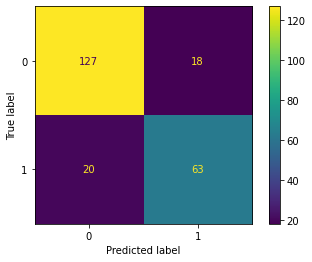

'ROC: '

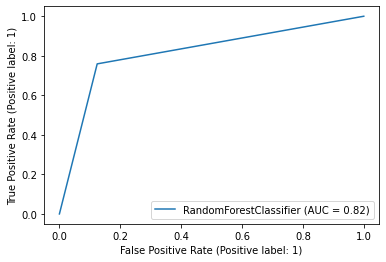

'AUC: 0.8174491067719153'

'============================='

'Resultados para estimators=2'

'Accuracy: 0.8596491228070176'

'Balanced accuracy: 0.8304113003739094'

'Precision: 0.8695652173913043'

'Recall: 0.7228915662650602'

'F1 Score: 0.7894736842105263'

'Confusion matrix: '

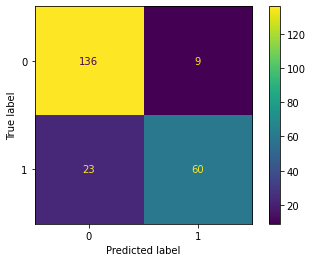

'ROC: '

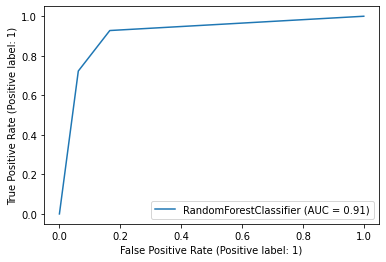

'AUC: 0.8304113003739095'

'============================='

'Resultados para estimators=5'

'Accuracy: 0.8947368421052632'

'Balanced accuracy: 0.8889073535521397'

'Precision: 0.8470588235294118'

'Recall: 0.8674698795180723'

'F1 Score: 0.8571428571428572'

'Confusion matrix: '

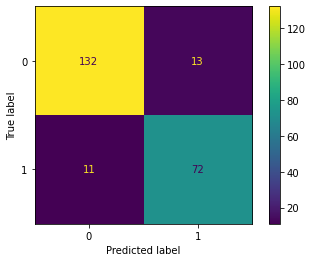

'ROC: '

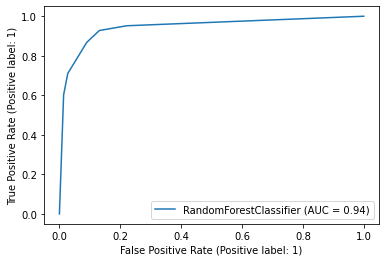

'AUC: 0.8889073535521397'

'============================='

'Resultados para estimators=10'

'Accuracy: 0.9122807017543859'

'Balanced accuracy: 0.9027004570004155'

'Precision: 0.8888888888888888'

'Recall: 0.8674698795180723'

'F1 Score: 0.8780487804878048'

'Confusion matrix: '

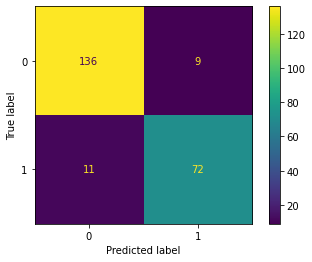

'ROC: '

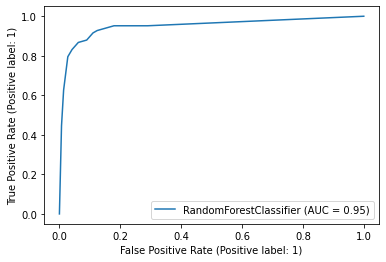

'AUC: 0.9027004570004155'

'============================='

'Resultados para estimators=100'

'Accuracy: 0.9342105263157895'

'Balanced accuracy: 0.9276692978811799'

'Precision: 0.9146341463414634'

'Recall: 0.9036144578313253'

'F1 Score: 0.9090909090909091'

'Confusion matrix: '

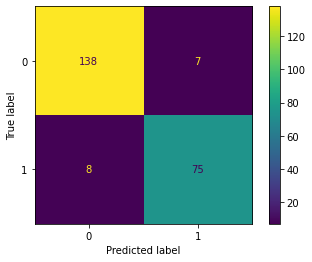

'ROC: '

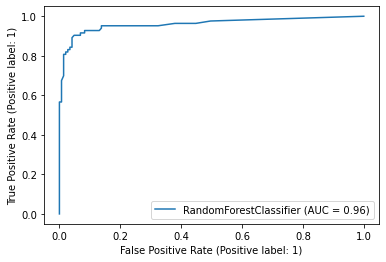

'AUC: 0.92766929788118'

'============================='

In [9]:
for key in models.keys(): # passando por todas as chaves possíveis no dicionário
    y_pred = models[key].predict(X_test)
    
    display(f'Resultados para estimators={key}')
    display(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    display(f'Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}')
    display(f'Precision: {precision_score(y_test, y_pred)}')
    display(f'Recall: {recall_score(y_test, y_pred)}')
    display(f'F1 Score: {f1_score(y_test, y_pred)}')
    
    display('Confusion matrix: ')
    plot_confusion_matrix(models[key], X_test, y_test)
    plt.show()
    
    display('ROC: ')
    plot_roc_curve(models[key], X_test, y_test)
    plt.show()
    
    display(f'AUC: {roc_auc_score(y_test, y_pred)}')
    display('=============================')